In [1]:
import drishtypy.utils.get_cuda as cuda
device = cuda.get_device()

cuda available
Device set to :  cuda:0


In [2]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

SEED = 1
batch_size=512

In [3]:
import os 
path = os.getcwd()
path  = path + '/dataset/'
print(path)

/home/abhinav/Drishtypy/dataset/


In [4]:
import drishtypy.data.returns_dataloader as dl
trainset, testset, train_loader, test_loader = dl.get_dataloader(batch_size=batch_size, num_workers=4, cuda = True,path = path)

['/home/abhinav/Drishtypy', '/home/abhinav/anaconda3/lib/python38.zip', '/home/abhinav/anaconda3/lib/python3.8', '/home/abhinav/anaconda3/lib/python3.8/lib-dynload', '', '/home/abhinav/.local/lib/python3.8/site-packages', '/home/abhinav/anaconda3/lib/python3.8/site-packages', '/home/abhinav/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/home/abhinav/.ipython', '/home/abhinav/Drishtypy']
Running over Cuda !!  True
Files already downloaded and verified
Files already downloaded and verified
mean 0.49186864
standard dev 0.24697131
mean 0.48265335
standard dev 0.24338901
mean 0.44717798
standard dev 0.26159254
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

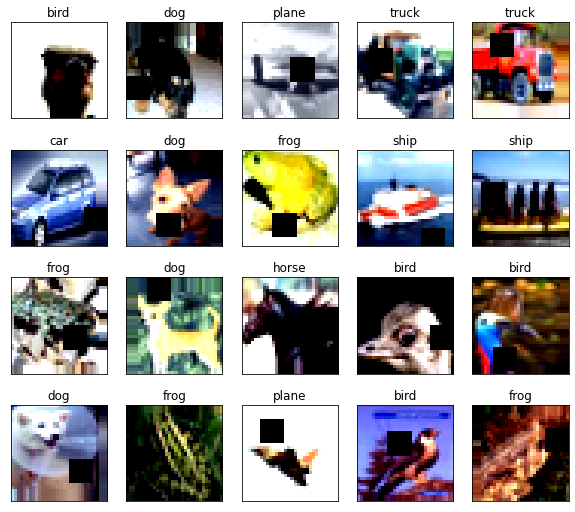

In [5]:
import drishtypy.viz.do_plots as plt
plt.plot_dataset_images(device, classes, train_loader)

In [6]:
import drishtypy.models.resnet_S11 as mod
model = mod.ResNet_11()




In [7]:
from drishtypy.learner.learner import model_summary
model_summary(model, device, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

In [8]:
# from drishtypy.utils.graphic_summary import graphical_summary
# graphical_summary(model)


In [9]:
from tqdm import tqdm
from drishtypy.learner.learner import build_model

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.11E-01


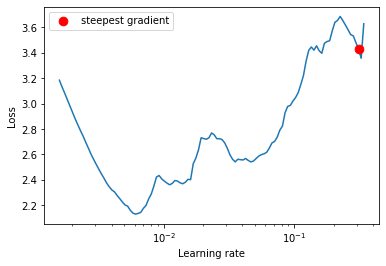

Using Learning Rate :  0.006080224261649422


In [10]:
import torch.optim as optim
import torch.nn as nn
from torch_lr_finder import LRFinder
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.95, nesterov=True)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=10, num_iter=200, step_mode="exp")
lr_finder.plot()
loss = lr_finder.history['loss']
lr = lr_finder.history['lr']
    
lr = lr[loss.index(min(loss))]
print('Using Learning Rate : ', lr)
lr_finder.reset()

In [17]:
import torch.nn as nn
from drishtypy.utils.LR_Test import lr_test
max_lr = lr * 100
min_lr = lr/6

print('Max LR :{} and MIN LR : {}'.format(max_lr,min_lr))
epoch = 10


Max LR :0.6080224261649422 and MIN LR : 0.0010133707102749038


In [ ]:
lr_test(max_lr, min_lr,device,epoch,model,criterion,train_loader,momemtum = 0.9,weight_decay=0.0005, plot= True)

epoch = 1 Lr = 0.0010133707102749038  Loss=0.014458875171840191 Batch_id=97 Accuracy=99.29: 100%|██████████| 98/98 [00:18<00:00,  5.24it/s]
epoch = 2 Lr = 0.061714276255741635  Loss=0.1841254085302353 Batch_id=38 Accuracy=96.86:  40%|███▉      | 39/98 [00:07<00:11,  5.20it/s]  

Tried different range near the best LR but not getting accuracy above above hence expanding the range difference of 100


In [13]:
# build and train the model
model_name = "Resnet11"
EPOCHS = 24
model =  model.to(device) # use GPU

# using L1 and L2 regularization
train_acc, train_losses, test_acc, test_losses = build_model(model, 
                                                            device, 
                                                            trainloader=train_loader, 
                                                            testloader=test_loader, 
                                                            epochs=EPOCHS,
                                                            L1_loss_flag=False,
                                                            L2_penalty_val=0.0005,
                                                            lr = 0)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.958230 Batch_id=97 Accuracy=37.27: 100%|██████████| 98/98 [00:18<00:00,  5.18it/s]

LR: [0.02084049079754601]



/home/abhinav/anaconda3/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:1205: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.946084, Accuracy: 4587/10000 (45.87%)

EPOCH: 1


Loss=1.415684 Batch_id=97 Accuracy=55.68: 100%|██████████| 98/98 [00:19<00:00,  5.07it/s]

LR: [0.04068098159509202]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 4.038765, Accuracy: 4404/10000 (44.04%)

EPOCH: 2


Loss=1.328826 Batch_id=97 Accuracy=63.04: 100%|██████████| 98/98 [00:19<00:00,  5.07it/s]

LR: [0.06052147239263804]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.251357, Accuracy: 6160/10000 (61.60%)

EPOCH: 3


Loss=1.176157 Batch_id=97 Accuracy=68.24: 100%|██████████| 98/98 [00:19<00:00,  5.05it/s]

LR: [0.08036196319018404]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.941271, Accuracy: 7256/10000 (72.56%)

EPOCH: 4


Loss=0.784789 Batch_id=97 Accuracy=75.83: 100%|██████████| 98/98 [00:19<00:00,  5.04it/s]

LR: [0.0999468313641246]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.270111, Accuracy: 6830/10000 (68.30%)

EPOCH: 5


Loss=0.644911 Batch_id=97 Accuracy=79.54: 100%|██████████| 98/98 [00:19<00:00,  4.91it/s]

LR: [0.09473630504833513]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.562978, Accuracy: 8135/10000 (81.35%)

EPOCH: 6


Loss=0.565492 Batch_id=97 Accuracy=81.75: 100%|██████████| 98/98 [00:19<00:00,  4.97it/s]

LR: [0.08952577873254565]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.531435, Accuracy: 8242/10000 (82.42%)

EPOCH: 7


Loss=0.427329 Batch_id=97 Accuracy=85.49: 100%|██████████| 98/98 [00:19<00:00,  5.01it/s]

LR: [0.08431525241675618]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.538177, Accuracy: 8165/10000 (81.65%)

EPOCH: 8


Loss=0.381461 Batch_id=97 Accuracy=86.95: 100%|██████████| 98/98 [00:19<00:00,  5.02it/s]

LR: [0.07910472610096671]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.542469, Accuracy: 8265/10000 (82.65%)

EPOCH: 9


Loss=0.333225 Batch_id=97 Accuracy=88.35: 100%|██████████| 98/98 [00:19<00:00,  4.94it/s]

LR: [0.07389419978517722]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.503741, Accuracy: 8418/10000 (84.18%)

EPOCH: 10


Loss=0.289054 Batch_id=97 Accuracy=89.91: 100%|██████████| 98/98 [00:19<00:00,  5.01it/s]

LR: [0.06868367346938775]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.498078, Accuracy: 8448/10000 (84.48%)

EPOCH: 11


Loss=0.252762 Batch_id=97 Accuracy=91.21: 100%|██████████| 98/98 [00:19<00:00,  5.03it/s]

LR: [0.06347314715359828]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.453075, Accuracy: 8578/10000 (85.78%)

EPOCH: 12


Loss=0.219030 Batch_id=97 Accuracy=92.32: 100%|██████████| 98/98 [00:19<00:00,  5.02it/s]

LR: [0.05826262083780881]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.417525, Accuracy: 8681/10000 (86.81%)

EPOCH: 13


Loss=0.190361 Batch_id=97 Accuracy=93.32: 100%|██████████| 98/98 [00:19<00:00,  4.92it/s]

LR: [0.05305209452201934]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.484826, Accuracy: 8526/10000 (85.26%)

EPOCH: 14


Loss=0.162305 Batch_id=97 Accuracy=94.32: 100%|██████████| 98/98 [00:19<00:00,  5.03it/s]

LR: [0.04784156820622986]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.445085, Accuracy: 8598/10000 (85.98%)

EPOCH: 15


Loss=0.142944 Batch_id=97 Accuracy=94.95: 100%|██████████| 98/98 [00:19<00:00,  5.00it/s]

LR: [0.042631041890440396]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.411110, Accuracy: 8727/10000 (87.27%)

EPOCH: 16


Loss=0.126468 Batch_id=97 Accuracy=95.60: 100%|██████████| 98/98 [00:19<00:00,  4.97it/s]

LR: [0.03742051557465091]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.414819, Accuracy: 8761/10000 (87.61%)

EPOCH: 17


Loss=0.108986 Batch_id=97 Accuracy=96.15: 100%|██████████| 98/98 [00:19<00:00,  5.02it/s]

LR: [0.03220998925886144]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.421546, Accuracy: 8809/10000 (88.09%)

EPOCH: 18


Loss=0.091870 Batch_id=97 Accuracy=96.84: 100%|██████████| 98/98 [00:19<00:00,  5.02it/s]

LR: [0.02699946294307197]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.384119, Accuracy: 8863/10000 (88.63%)

EPOCH: 19


Loss=0.077155 Batch_id=97 Accuracy=97.27: 100%|██████████| 98/98 [00:20<00:00,  4.87it/s]

LR: [0.021788936627282485]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.413684, Accuracy: 8876/10000 (88.76%)

EPOCH: 20


Loss=0.062283 Batch_id=97 Accuracy=97.90: 100%|██████████| 98/98 [00:19<00:00,  4.99it/s]

LR: [0.016578410311493028]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.359352, Accuracy: 9020/10000 (90.20%)

EPOCH: 21


Loss=0.049635 Batch_id=97 Accuracy=98.40: 100%|██████████| 98/98 [00:19<00:00,  5.01it/s]

LR: [0.011367883995703543]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.370356, Accuracy: 9010/10000 (90.10%)

EPOCH: 22


Loss=0.041182 Batch_id=97 Accuracy=98.69: 100%|██████████| 98/98 [00:19<00:00,  5.02it/s]

LR: [0.006157357679914072]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.344577, Accuracy: 9062/10000 (90.62%)

EPOCH: 23


Loss=0.031223 Batch_id=97 Accuracy=99.07: 100%|██████████| 98/98 [00:19<00:00,  4.93it/s]

LR: [0.0009468313641246007]



Test set: Average loss: 0.336973, Accuracy: 9090/10000 (90.90%)



In [ ]:
from drishtypy.learner.learner import get_test_accuracy,class_based_accuracy
get_test_accuracy(model, device, test_loader)
class_based_accuracy(model, device, classes, test_loader)

In [ ]:
from drishtypy.viz.do_plots import  plot_model_history
print("\nPloting Accuracy and Loss history: {}\n".format(model_name))
plot_model_history(model_name, 
                   train_acc,test_acc,
                   train_losses,test_losses,
                   save_filename = "model_history")

In [ ]:
# import gradcam.gradcam_abs as gradcamAbs1
import drishtypy.viz.gradcam.gradcam_abs as gradcamAbs1
from drishtypy.data.data_utils import find_stats
means,stds = find_stats(path)

In [ ]:
path = os.getcwd() + '/Out'


In [ ]:
# config = dict(model_type='resnet', arch=model, layer_name='layer4')
# gcam = gradcamAbs1.GradCamAbs(device, config, means, stds)

# gradcam_images, pred_results = gcam.applyOnMisclassifiedImages(dataloader=test_loader, num_of_images=25)

# gcam.plot_results(gradcam_images, pred_results, classes, save_filename="gradcam_result_details")

In [ ]:
import matplotlib.pyplot as plt
from drishtypy.learner import learner
epochs = []
for i in range(24):
  epochs.append(i+1)

plt.plot(epochs,learner.LR)
plt.ylabel('Learning rate')
plt.xlabel("epoch")
plt.title("Lr v/s epochs")
plt.show()